# IS597MLC: Dimensionality Reduction Model Finetuning Assignment





### Student Name:   Shrey Shah
### Net ID:  sshah023

# Instructions

* This assignment consists of two regular exercises. You are required to write your code in a cell with instruction comments included. You may add more cells if needed. 

* Please do not change exercise numbers or instruction comments. Also, do not remove or modify if any cells include image of expected outputs.  

* Please be aware that there is no one absolute solution to answer a question, i.e., tasks can have multiple correct solution methods you can choose from. 

* Once you have completed all exercises, update the file name by adding your surname and given name at the end of file name (e.g., IS597MLC_Dimensionality_Reduction_Model_Finetuning_Assignment_Kim_Jenna.ipynb).  

* Make sure that all the codes in your updated Jupyter Notebook run properly before you submit it. If a grader encounters an error while attempting to run your codes, points will be deducted even if the code looks correct. If you are sure your files are ready to go, include them into a folder with the same naming convetion for the Jupyter notebook. Zip the folder into one file and upload it to the UIUC Canvas assignment section.     

#### Your submitted zipped file should include the following items:  
**- Updated Jupyter Notebook with your codes included**  
**- Dataset file provided by the instructor**      

# Load Library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

You are expect to create a classification model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...). Here is the information about the dataset you need to use for this assignment.

**"heart_disease_data.csv"**

This database contains 14 physical attributes based on physical testing of a patient, such as blood samples, exercise test, etc. The 'target' attribute indicates the diagnosis (presence) of heart disease in the patient, using 0 for no presence and 1 for presence. The original data can be found at the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/45/heart+disease).


Attributes:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 1 for presence of heart disease, 0 for no heart disease


# Exercise 1 (Regular)

## Ex 1-1. Load Data

* **Follow the instructions in each cell to write your code**

In [2]:
# read in data from input csv file

input_filename = "heart_disease_data.csv"
data = pd.read_csv(input_filename)

In [3]:
# check how many rows and columns

print("-------- Data Rows and Columns --------", "\n")
rows = data.shape[0]
columns = data.shape[1]
print("No. of rows: ", rows)
print("No. of columns: ", columns)

-------- Data Rows and Columns -------- 

No. of rows:  303
No. of columns:  14


In [4]:
# display the first 5 instances of the data

print("-------- First 5 instances of Data --------", "\n")
data.head()

-------- First 5 instances of Data -------- 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Ex 1-2. Descriptive Data Analysis and Visualization

* **Look at the data and create a statistical summary of the numerical features.**  
* **Follow the instructions in each cell to write your code**

In [5]:
# display data types of each attribute and see if there are any null values

print("-------- Attribute Data Types and Null Check --------", "\n")
data.info()

-------- Attribute Data Types and Null Check -------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# display count, mean, min and max values for each attribute.

print("-------- Attribute count, mean, min, max --------", "\n")
data.describe()

-------- Attribute count, mean, min, max -------- 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# show the distribution of target class
# to make sure that this is a binary classification task.

print("-------- Distribution of target class --------", "\n")
data['target'].value_counts()

-------- Distribution of target class -------- 



target
1    165
0    138
Name: count, dtype: int64

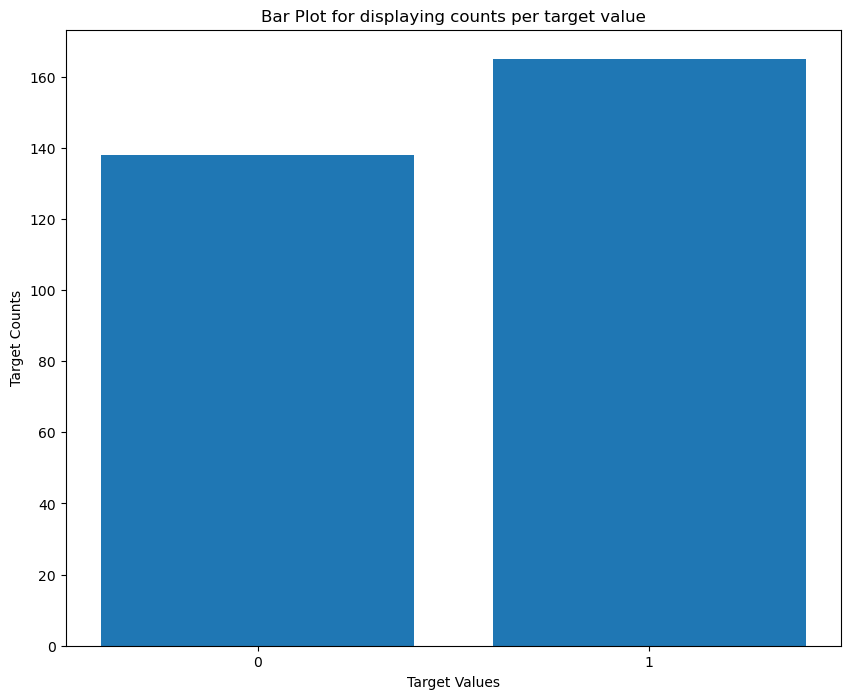

In [8]:
# create a bar plot to display the counts per target value

plt.figure(figsize=(10,8))
plt.bar(data['target'].unique(), data['target'].value_counts())
plt.title("Bar Plot for displaying counts per target value")
plt.xlabel("Target Values")
plt.ylabel("Target Counts")
plt.xticks(data['target'].unique())
plt.show()

<Figure size 1000x800 with 0 Axes>

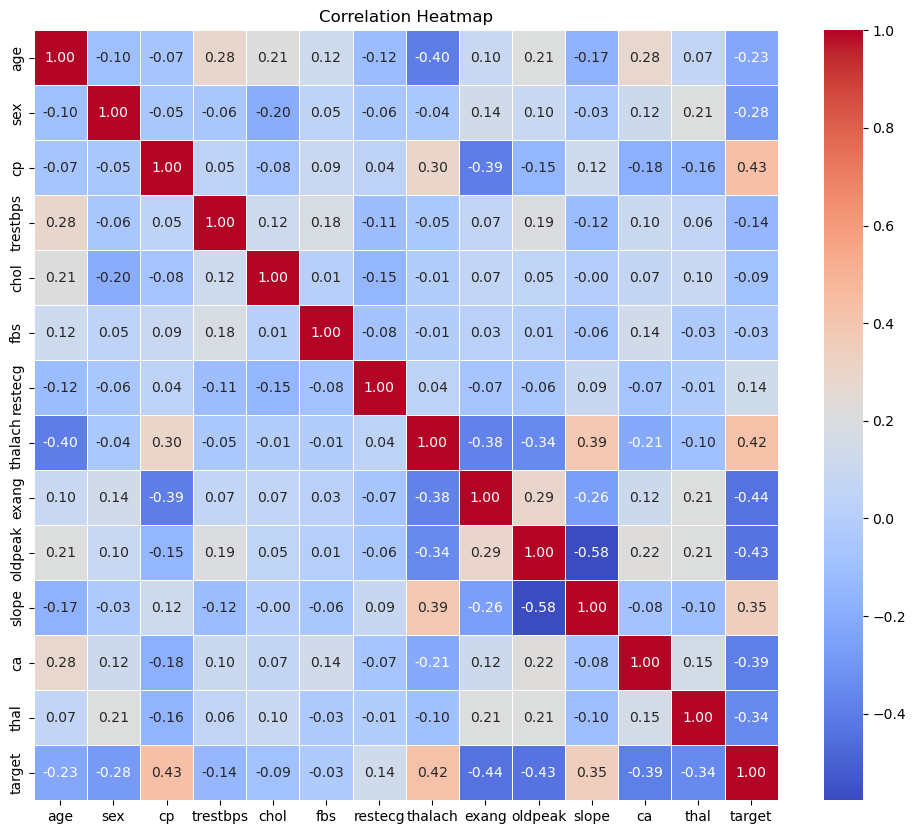

In [10]:
# Create a heatmap that displays the correlation between all the columns

# this is for figure size
plt.figure(figsize=(10,8))

# Insert your code here
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Ex 1-3. Train and Test Split  

* **Follow the instructions in each cell to write your code.**   
* **You may refer the code example demonstrated in a lecture video.**

In [11]:
# import necessary modules from libaries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# let's split data into X and y data

X = data.drop(columns=['target'])
y = data['target']

In [13]:
# split the data into train & test set
# set the test size with 10% of the data and a random_state = 101
# note: you do not need to create validation set for this assignment.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
# normalize data in your features by scaling the numerical values 
# you only need to fit to training data to avoid data leakage

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# display the first 3 instance of scaled X train data

X_train_scaled[:3, :]

array([[ 1.04970247,  0.69737995,  1.97993226, -1.23533257, -0.6689593 ,
        -0.42732739, -0.99577247, -0.26215945,  1.47064295,  0.72762654,
        -0.67167968, -0.71422572, -0.4842146 ],
       [ 0.61644136,  0.69737995, -0.94692412, -0.83741797, -0.30815971,
         2.34012617,  0.89828426,  0.4395121 ,  1.47064295,  0.37070243,
         0.9451068 ,  1.23823052,  1.14178999],
       [-0.68334197,  0.69737995,  0.02869467, -1.23533257, -0.32714917,
        -0.42732739,  0.89828426,  0.79034787, -0.6799747 ,  0.01377832,
        -2.28846615, -0.71422572,  1.14178999]])

# Exercise 2 (Regular)

## Ex 2-1. Create a Model   

* **Conduct Grid Search using Cross Validation.**     
* **Create a Logistic regression model. If you want, you can try other models used for classification tasks.**    
* **Find the optimal parameter values with 10-fold cross validation.**    
* **Set random_state to 50 for replication while running the grid search process.**     
* **Fit the model with the values of best parameters.**  
* **After model fitting has been completed, check selected paramter values and model's coefficients per feature.**    




In [16]:
# import necessary modules

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [18]:
# conduct grid search 

param_grid = {
    'C': np.logspace(-3, 3, 7),             # Regularization parameter
    'penalty': ['l1', 'l2'],                # Penalty term
    'solver': ['liblinear', 'saga'],        # Algorithm for optimization
    'max_iter': [100, 200, 300],            # Maximum number of iterations
    'class_weight': [None, 'balanced'],     # Weighting of classes
}

# Raw logistic regression model
logistic_model = LogisticRegression(random_state=50)

# Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=50),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [19]:
# fit model with the optimal parameters

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [20]:
# check out the selected paramters' values

print("Best Parameters:", best_params)

# 5. Check the selected parameter values and model's coefficients per feature
print("\nSelected Parameter Values:", best_model.get_params())

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Selected Parameter Values: {'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 50, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [21]:
# checl model's coefficients

print("Model's Coefficients per Feature:\n")

coefficients = best_model.coef_[0]
for feature, coef in zip(data.columns, coefficients):
    print(f"{feature}: {coef}")

Model's Coefficients per Feature:

age: -0.0829221404339891
sex: -0.18744474204749534
cp: 0.2763414592735364
trestbps: -0.07021522079782326
chol: -0.04251406222558645
fbs: 0.005737455208175435
restecg: 0.049545219260740965
thalach: 0.18864734803945665
exang: -0.21197235229553255
oldpeak: -0.2054415223811565
slope: 0.15709224213780518
ca: -0.25087928257973013
thal: -0.203686858805385


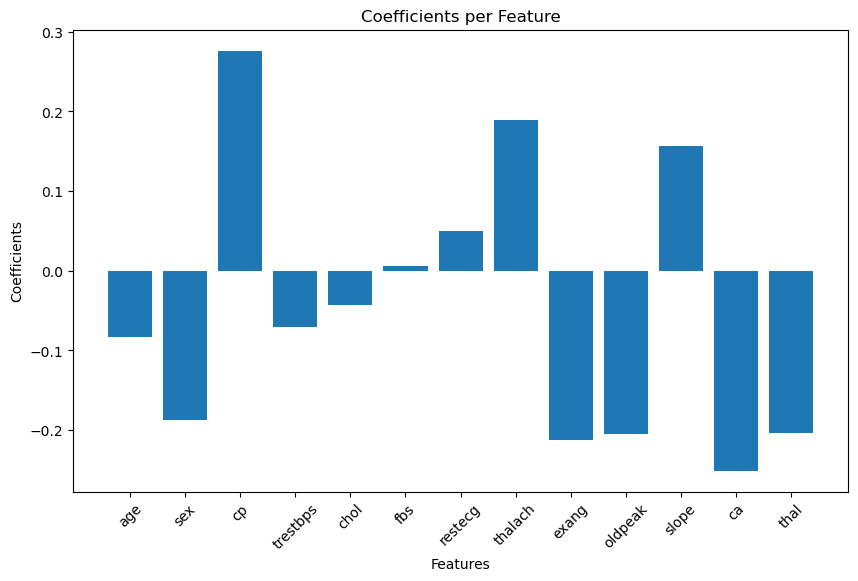

In [22]:
# visualize the coefficient values

features = X.columns
coefficients = best_model.coef_[0]

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.title("Coefficients per Feature")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

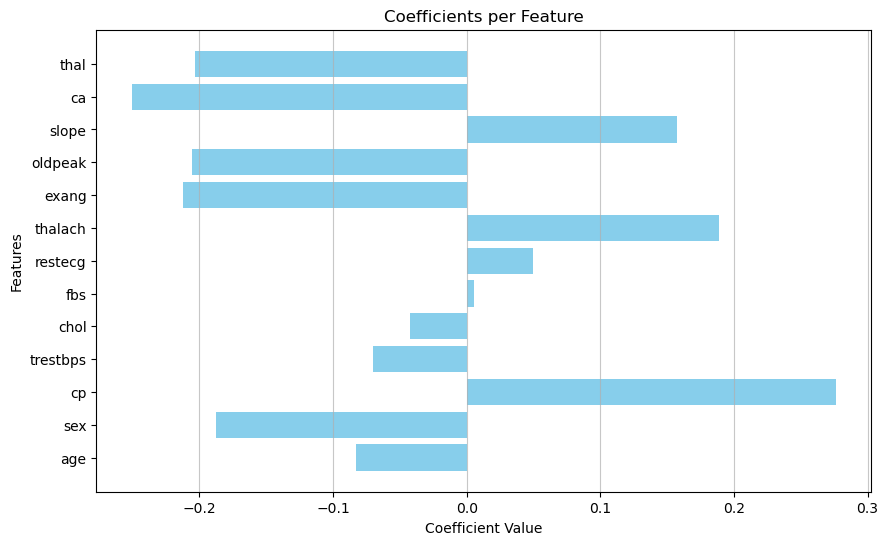

In [23]:
# create a bar plot with coefficient values

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients per Feature')
plt.grid(axis='x', alpha=0.7)
plt.show()

## Ex 2-2. Model Performance Evaluation  

* **Evaluate the model performance with confusion matrix and evalaution scores.**

In [24]:
# import necessary libraries

from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# predict with test data

y_pred = best_model.predict(X_test_scaled)

In [26]:
# create a confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[12  3]
 [ 2 14]]


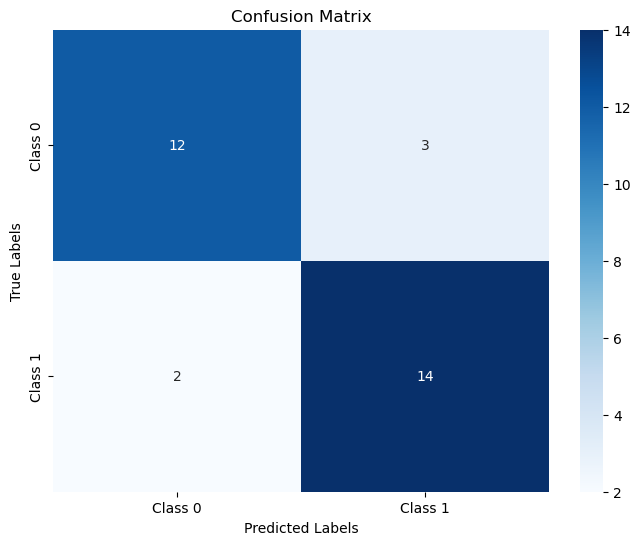

In [28]:
# display a confusion matrix with colors and label names

conf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['Class 0', 'Class 1']  # Replace with your class names

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
# create a classification report
# to show accuracy, precision, recall, and f1 score

classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

